### Base Comparison

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
n = 1000
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)

#### matplotlib

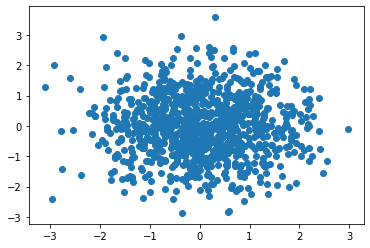

In [4]:
plt.scatter(x, y);

#### altair

In [5]:
df = pd.DataFrame({
    'x': x,
    'y': y
})

In [6]:
import altair as alt

alt.Chart(df).encode(x='x', y='y').mark_circle()

alt.Chart(...)

### Marks 

#### 1. Bar

<img src="../images/github.png" alt="github" width="200">

In [7]:
packages = pd.DataFrame({
    'downloads': [8000, 3000, 9000, 4000],
    'package': ['gazpacho', 'gif', 'mummify', 'mark']
})

alt.Chart(packages).mark_bar().encode(
    x='package',
    y='downloads'
)

alt.Chart(...)

In [8]:
alt.Chart(packages).mark_bar().encode(
    y='package',
    x='downloads'
)

alt.Chart(...)

#### 2. Line

<img src="../images/dad.jpg" alt="dad" width="200">

In [9]:
marathon = pd.read_csv('../data/marathon.csv')
marathon['time'] = marathon['time'].apply(pd.to_datetime)
rich = marathon[marathon['runner'] == 'Rich H.']

In [10]:
rich.head()

,time,distance,runner,dsplit,mph,hour,gender
376,2019-03-24 18:00:00,0.000000,Rich H.,10.430340,5.215170,0,male
377,2019-03-24 20:00:00,10.430340,Rich H.,10.430340,5.215170,2,male
378,2019-03-24 22:00:00,20.860680,Rich H.,7.822755,3.911377,4,male
379,2019-03-24 23:59:00,28.683435,Rich H.,7.822755,3.911377,6,male
380,2019-03-25 02:00:00,36.506190,Rich H.,7.822755,3.911377,8,male


In [11]:
alt.Chart(rich).mark_line().encode(
    x='time',
    y='distance'
)

alt.Chart(...)

#### 3. Circle

Encoding Data Types


| Data Type    | Shorthand Code | Description                       |
| ------------ | -------------- | --------------------------------- |
| quantitative | `Q`            | a continuous real-valued quantity |
| ordinal      | `O`            | a discrete ordered quantity       |
| nominal      | `N`            | a discrete unordered category     |
| temporal     | `T`            | a time or date value              |
| geojson      | `G`            | a geographic shape                |


In [12]:
from vega_datasets import data

cars = data.cars()

alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
)

alt.Chart(...)

boooooooooring.....

<img src="../images/bond.jpg" alt="bond" width="500">

In [13]:
cocktails = pd.read_csv('../data/cocktails.tsv', delimiter='\t')

In [14]:
cocktails.sample(3)

,name,abv,acid,sugar,type,index,instructions,ingredients,ncotw
31,Martinez,22.5,0.13,6.6,stirred,36,"Stir, coupe. Lemon twist.",2 oz Old Tom gin (40% abv)<br/>1 oz sweet verm...,"<a href=""https://www.reddit.com/r/cocktails/co..."
15,20th Century Cocktail,17.3,0.85,6.5,shaken,20,"Shake, coupe.",1 1/2 oz gin (47% abv)<br/>3/4 oz lemon juice<...,"<a href=""https://www.reddit.com/r/cocktails/co..."
52,Gin and Juice Centrifuge,15.8,0.91,7.2,carbonated,57,"Chill, carbonate.",1 6/8 oz centrifuge-clarified grapefruit juice...,not yet


In [15]:
alt.Chart(cocktails).mark_circle(size=100).encode(
    x='acid',
    y='sugar',
    color='type'
)

alt.Chart(...)

### Other Marks

#### Tick

In [16]:
alt.Chart(cocktails).mark_tick().encode(
    x='abv',
    y='type'
)

alt.Chart(...)

#### Heatmap

In [17]:
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

boring = pd.DataFrame({
    'x': x.ravel(),
    'y': y.ravel(),
    'z': z.ravel()
})

In [18]:
boring.sample(5)

,x,y,z
94,-1,4,17
79,4,2,20
50,-5,0,25
86,1,3,10
71,-4,2,20


In [19]:
alt.Chart(boring).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

alt.Chart(...)

#### 🦉

<img src="../images/art_attack.jpg" alt="art attack" width="500">

In [20]:
owl = pd.read_csv('../data/owl.csv')

In [21]:
owl.sample(5)

,X,Y,Colour
10,1,11,Blue
87,8,11,Blue
119,11,10,Blue
62,6,8,Dark Brown
6,1,7,Blue


In [22]:
alt.Chart(owl).mark_rect().encode(
    x='X:O',
    y='Y:O',
    color='Colour:N'
)

alt.Chart(...)

#### Area

In [23]:
dads = marathon[marathon['runner'].isin(['Brian F.', 'Rich H.'])]

In [24]:
dads.sample(5)

,time,distance,runner,dsplit,mph,hour,gender
9,2019-03-25 12:01:00,57.366870,Brian F.,5.215170,2.607585,18,male
10,2019-03-25 14:00:00,62.582040,Brian F.,5.215170,2.607585,20,male
395,2019-03-26 06:00:00,99.088230,Rich H.,2.607585,1.303792,36,male
381,2019-03-25 04:00:00,44.328945,Rich H.,5.215170,2.607585,10,male
7,2019-03-25 08:00:00,46.936530,Brian F.,5.215170,2.607585,14,male


In [25]:
alt.Chart(dads).mark_area(opacity=3/4).encode(
    x="hour",
    y="distance",
    color="runner:N"
)

alt.Chart(...)

#### Histogram

In [26]:
df = data.movies.url

alt.Chart(df).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [27]:
finish = marathon[marathon.hour == 48]

In [28]:
alt.Chart(finish).mark_bar().encode(
    x=alt.X("distance:Q", bin=True),
    y='count()',
)

alt.Chart(...)

#### TL;DR:

<img src="../images/choose.png" alt="choose" width="1000">

#### Exercise

Use the `cocktails` data set to create your own Altair chart!